# 2. (20 points) Open-Loop Control

In [1]:
from control import ackerman_kin, skid_steer_kin
import matplotlib.pyplot as plt
import math

W = 3.048  # 10ft in meters, width of vehicle
L = 10.668  # 35ft in meters, length of vehicle

#### (a) (5 points) Make a list of commands (at 2Hz) that will allow this robot to traverse along the edge of an 18m radius circle. The robot starts off in the center of the circle (0,0). Plot the resulting path (x, y) and trajectory (x, y, and angular velocities). Assume a constant velocity of 8m/s.

In [2]:
R = 18  # Radius of the circcle
ALPHA_TARGET = math.atan(L/R) # Alpha that will move the car in a circle of radius R

alpha = math.atan(L/(R/2)) # Start with alpha that will make a circle of R/2
v = 8
dt = .5
x = [0]
y = [0]
theta = [0]
t = [0]
omega = [0]

steps = 35
for i in range(steps):
    x_new, y_new, theta_new = ackerman_kin(v, x[i], y[i], alpha, theta[i], dt)
    x.append(x_new)
    y.append(y_new)
    theta.append(theta_new)
    t.append(t[i] + dt)
    r = math.sqrt(x_new**2 + y_new**2)
    omega.append(v/r)
    
    # When car reaches the edge change alpha to 
    if r >= R:
        alpha = ALPHA_TARGET


print(x)
print(y)
print(theta)
print(omega)

[0, 0.0, -1.7198254541134224, -4.825313139316064, -8.713064744769316, -12.627687562632664, -15.80856779072486, -17.637658297268107, -17.759565587296052, -16.99729373579411, -15.388331142239199, -13.0118063122055, -9.984596330973785, -6.4555788684374535, -2.5983104007223394, 1.3975092676693741, 5.33536640784785, 9.021597878162002, 12.274915444432317, 14.935321504347602, 16.871977742222427, 17.989639735018123, 18.23334105680208, 17.591096518188, 16.09449159590311, 13.817129064436854, 10.87100922416128, 7.401021745686052, 3.577820020601952, -0.41057154317354794, -4.368004529667074, -8.099853060448908, -11.422585462096169, -14.172790322548416, -16.215213036445554, -17.449407603520818]
[0, 4.0, 7.611398677435594, 10.132498881127376, 11.073449174339332, 10.2514222928667, 7.8261386033713585, 4.268832330519192, 0.27069043550870564, -3.65600558333561, -7.318141486403799, -10.53561405539849, -13.150188538852936, -15.033280610184985, -16.092280122918915, -16.275105661873233, -15.572765898264912, 

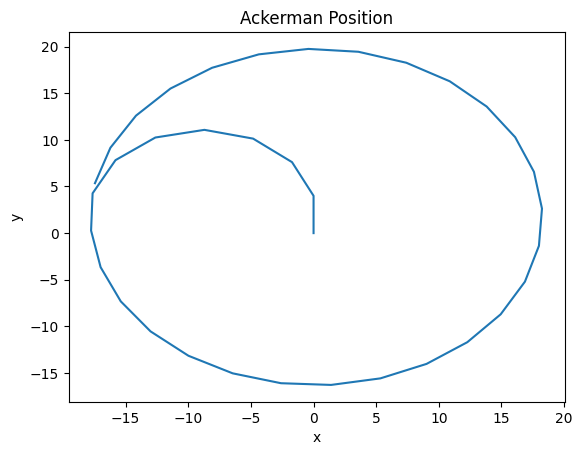

In [3]:
plt.plot(x, y)
plt.title("Ackerman Position")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

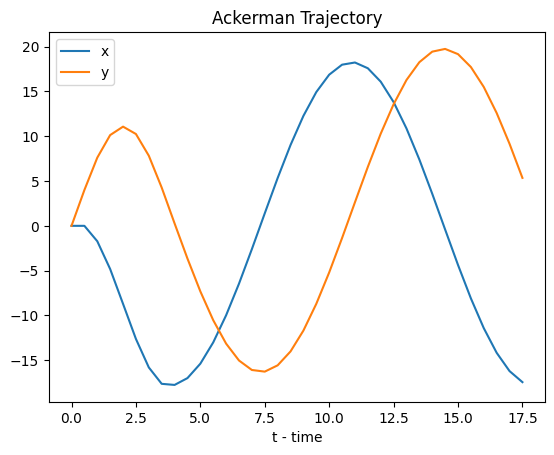

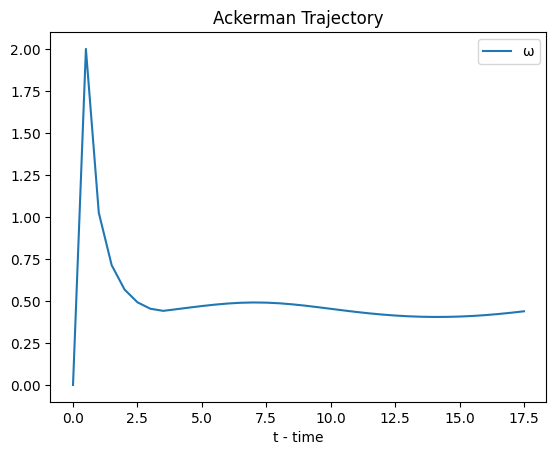

In [4]:
plt.plot(t, x, label="x")
plt.plot(t, y, label="y")
plt.xlabel("t - time")
plt.title("Ackerman Trajectory")
plt.legend()
plt.show()

plt.plot(t,omega, label="\u03C9")
plt.title("Ackerman Trajectory")
plt.xlabel("t - time")
plt.legend()
plt.show()

# (b) (5 points) Do the same as the above for an equivalent skid-steer vehicle.

In [5]:
R = 18  # Radius of the circcle
V = 8 # Average veloocity between wheels
V_LEFT = V - (V*W)/(2 * R) # Initalt try to make circle of R/2
V_RIGHT = 2 * V - V_LEFT

v_left = V - (V*W)/(R) # Initalt try to make circle of R/2
v_right = 2 * V - v_left
dt = .5
x = [0]
y = [0]
theta = [0]
t = [0]
omega = [0]

steps = 35
for i in range(steps):
    x_new, y_new, theta_new = skid_steer_kin(v_left, v_right, x[i], y[i], theta[i], dt)
    x.append(x_new)
    y.append(y_new)
    theta.append(theta_new)
    t.append(t[i] + dt)
    r = math.sqrt(x_new**2 + y_new**2)
    omega.append(((v_left+v_right)/2)/r)
    
    # When car reaches the edge change alpha to 
    if r >= R:
        v_left = V_LEFT
        v_right = V_RIGHT


print(x)
print(y)
print(theta)
print(omega)

[0, 0.0, -1.7198254541134224, -4.825313139316064, -8.713064744769316, -12.627687562632664, -15.80856779072486, -17.637658297268107, -17.759565587296052, -16.99729373579411, -15.388331142239199, -13.0118063122055, -9.984596330973785, -6.4555788684374535, -2.5983104007223394, 1.3975092676693741, 5.33536640784785, 9.021597878162002, 12.274915444432317, 14.935321504347602, 16.871977742222427, 17.989639735018123, 18.23334105680208, 17.591096518188, 16.09449159590311, 13.817129064436854, 10.87100922416128, 7.401021745686052, 3.577820020601952, -0.41057154317354794, -4.368004529667074, -8.099853060448908, -11.422585462096169, -14.172790322548416, -16.215213036445554, -17.449407603520818]
[0, 4.0, 7.611398677435594, 10.132498881127376, 11.073449174339332, 10.2514222928667, 7.8261386033713585, 4.268832330519192, 0.27069043550870564, -3.65600558333561, -7.318141486403799, -10.53561405539849, -13.150188538852936, -15.033280610184985, -16.092280122918915, -16.275105661873233, -15.572765898264912, 

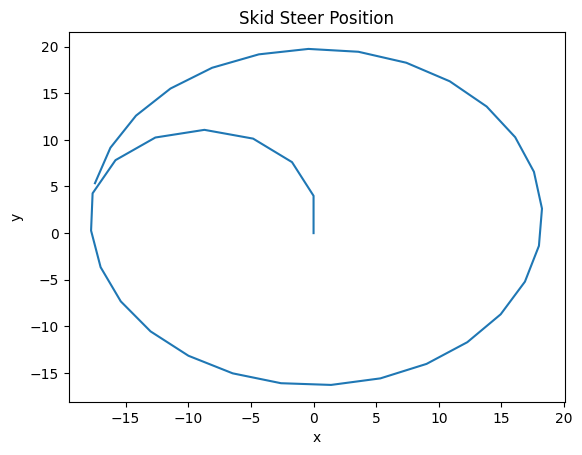

In [6]:
plt.plot(x, y)
plt.title("Skid Steer Position")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

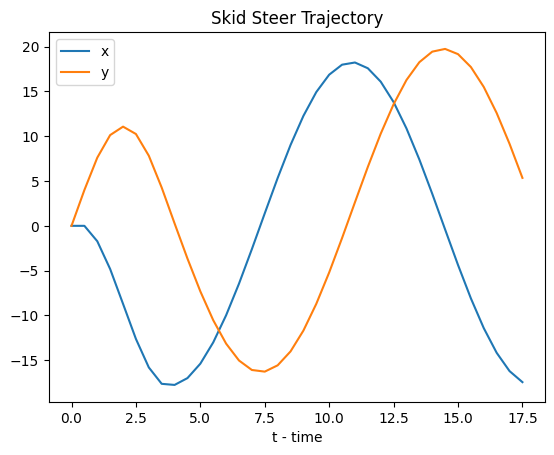

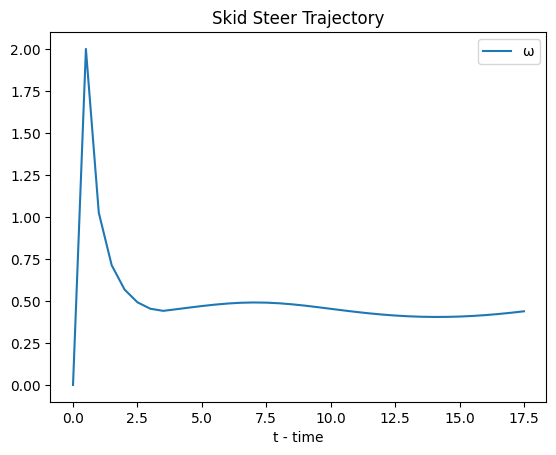

In [7]:
plt.plot(t, x, label="x")
plt.plot(t, y, label="y")
plt.xlabel("t - time")
plt.title("Skid Steer Trajectory")
plt.legend()
plt.show()

plt.plot(t,omega, label="\u03C9")
plt.title("Skid Steer Trajectory")
plt.xlabel("t - time")
plt.legend()
plt.show()